<a href="https://colab.research.google.com/github/dipansh-girdhar/Projects-Assignments---Data-Science-Analytics/blob/master/DBCAN%20Clustering/DBSCAN_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import io

In [0]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Credit Card Dataset.csv to Credit Card Dataset.csv


In [0]:
df=pd.read_csv(io.BytesIO(uploaded['Credit Card Dataset.csv']))

In [0]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Preprocessing

In [0]:
df = df.drop('CUSTOMER_ID', axis = 1) 

In [0]:
df.fillna(method ='ffill', inplace = True) 

**Scaling the data to bring all the attributes to a comparable level**

In [0]:
scaler = StandardScaler() 
df_scaled = scaler.fit_transform(df)

In [0]:
df_normalized = normalize(df_scaled) 
df_normalized = pd.DataFrame(df_normalized) 

In [0]:
df_normalized.shape

(8950, 17)

In [0]:
corr = df_normalized.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,0.297441,0.114129,0.131865,0.0280014,0.496657,-0.113998,0.0708695,-0.112117,0.440013,0.416517,0.0771743,0.419697,0.299457,0.518118,-0.27528,0.0014289
1,0.297441,1,0.0488131,0.036884,0.0414811,0.0262937,0.125841,0.112356,0.0890189,0.13766,0.0893616,0.0989545,-0.0183666,-0.018212,0.127591,-0.202649,0.142185
2,0.114129,0.0488131,1,0.873444,0.674764,-0.0218075,0.514695,0.583926,0.379272,-0.100684,-0.0392269,0.732816,0.324502,0.463636,0.116448,0.231557,-0.0200071
3,0.131865,0.036884,0.873444,1,0.230114,-0.00113084,0.294589,0.669232,0.0737754,-0.050991,-0.00855909,0.53825,0.295071,0.407018,0.0726437,0.128888,-0.0278723
4,0.0280014,0.0414811,0.674764,0.230114,1,-0.0421107,0.582324,0.152783,0.646308,-0.123965,-0.0655227,0.649045,0.201283,0.309566,0.122564,0.267261,0.00215392
5,0.496657,0.0262937,-0.0218075,-0.00113084,-0.0421107,1,-0.205663,-0.0567097,-0.167939,0.651103,0.68141,-0.0522037,0.269436,0.43614,0.242361,-0.0740194,-0.14712
6,-0.113998,0.125841,0.514695,0.294589,0.582324,-0.205663,1,0.429281,0.879264,-0.284276,-0.203967,0.693622,0.110953,0.108816,0.00536169,0.299019,-0.00143314
7,0.0708695,0.112356,0.583926,0.669232,0.152783,-0.0567097,0.429281,1,0.0503238,-0.0726242,-0.0369174,0.547735,0.250981,0.240144,0.0161025,0.116398,-0.000728844
8,-0.112117,0.0890189,0.379272,0.0737754,0.646308,-0.167939,0.879264,0.0503238,1,-0.240253,-0.171338,0.616117,0.0498794,0.0743684,0.0223793,0.266386,0.0125452
9,0.440013,0.13766,-0.100684,-0.050991,-0.123965,0.651103,-0.284276,-0.0726242,-0.240253,1,0.860955,-0.109127,0.086915,0.232756,0.203051,-0.162218,-0.145521


### Dimensionality Reduction

In [0]:
pca = PCA(n_components = 2) 
df_principal = pca.fit_transform(df_normalized) 
df_principal = pd.DataFrame(df_principal) 
df_principal.columns = ['P1', 'P2'] 
df_principal.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827
2,0.330633,0.268879
3,-0.481657,-0.097610
4,-0.563512,-0.482506


## Clustering Model

In [0]:
dbscan_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(df_principal) 
labels = dbscan_default.labels_ 

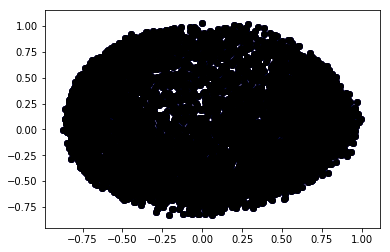

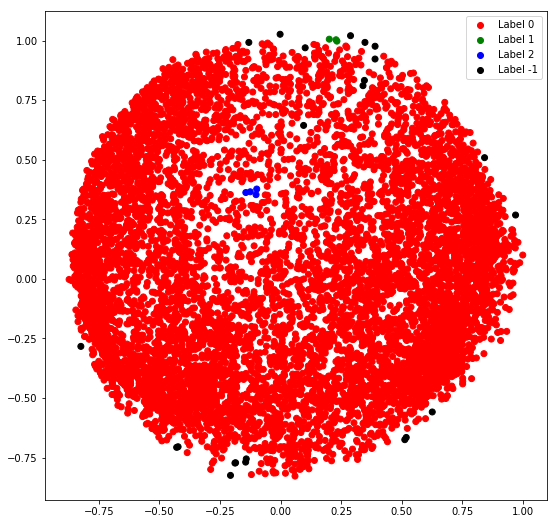

In [0]:
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(df_principal['P1'], df_principal['P2'], color ='r'); 
g = plt.scatter(df_principal['P1'], df_principal['P2'], color ='g'); 
b = plt.scatter(df_principal['P1'], df_principal['P2'], color ='b'); 
k = plt.scatter(df_principal['P1'], df_principal['P2'], color ='k'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(df_principal['P1'], df_principal['P2'], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 
  
plt.show() 

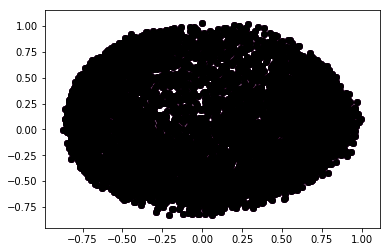

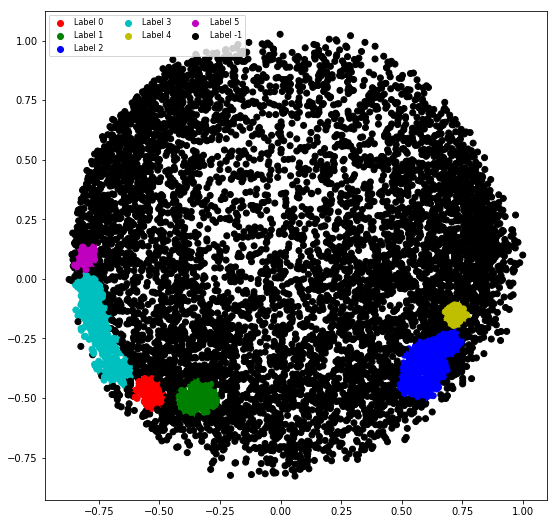

In [0]:
dbscan_default = DBSCAN(eps = 0.0375, min_samples = 50).fit(df_principal) 
labels = dbscan_default.labels_ 
colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels] 
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter( 
        df_principal['P1'], df_principal['P2'], marker ='o', color = colors[0]) 
g = plt.scatter( 
        df_principal['P1'], df_principal['P2'], marker ='o', color = colors[1]) 
b = plt.scatter( 
        df_principal['P1'], df_principal['P2'], marker ='o', color = colors[2]) 
c = plt.scatter( 
        df_principal['P1'], df_principal['P2'], marker ='o', color = colors[3]) 
y = plt.scatter( 
        df_principal['P1'], df_principal['P2'], marker ='o', color = colors[4]) 
m = plt.scatter( 
        df_principal['P1'], df_principal['P2'], marker ='o', color = colors[5]) 
k = plt.scatter( 
        df_principal['P1'], df_principal['P2'], marker ='o', color = colors[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(df_principal['P1'], df_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show() 

In [0]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5}

In [0]:
def CountFrequency(my_list): 
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq

In [0]:
dict1={}
dict1=CountFrequency(labels)

In [0]:
dict1

{-1: 7218, 0: 134, 1: 217, 2: 564, 3: 646, 4: 83, 5: 88}

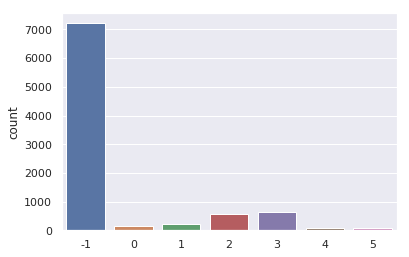

In [0]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x=labels)

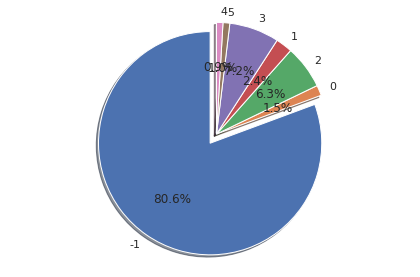

In [0]:
labels=list(dict1.keys())
sizes=list(dict1.values())
explode = (0.1,0,0,0, 0, 0, 0)
#add colors
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()